**生存率**：一个分类中存活的人数/分类中整体的人数<br/>
**因变量**：生存率 <br/>
**自变量**
- Sex
- Pclass
- Age
- Fare

问题：
- 生存率和性别的关系？
- 生存率和年龄的关系？
- 生存率和船舱等级的关系？

In [40]:
#读取表格，并查看表头
import pandas as pd
import seaborn as sns


df = pd.read_csv('titanic-data.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#查看数据分布
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#查看空值情况
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
#去掉有空值，且在研究范围外的列
del df['Cabin']
del df['Embarked']
df.isnull().any()


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
dtype: bool

In [81]:
#使用fillna()函数填上空值
df = df.fillna(method='pad')

In [9]:
#再次查看数据情况
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


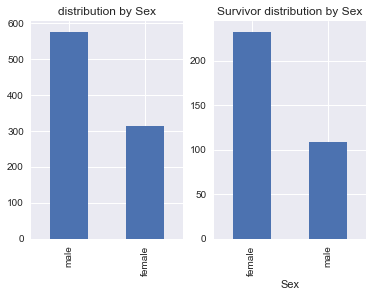

In [48]:
#船上人按照性别的分布
import matplotlib.pyplot as plt

plt.subplot2grid((1,2),(0,0))
df.Sex.value_counts().plot(kind='bar')
plt.title('distribution by Sex')

plt.subplot2grid((1,2),(0,1))
df.groupby('Sex').sum()['Survived'].plot(kind = 'bar')
plt.title('Survivor distribution by Sex')

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

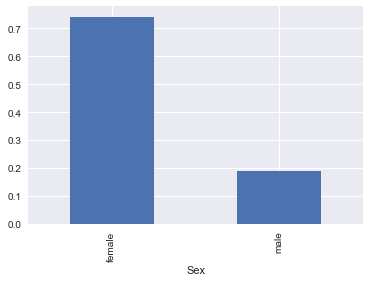

In [18]:
#不同性别的生还率
sex_p = df.groupby('Sex')['Survived'].sum()/df.groupby('Sex')['Survived'].count()
sex_p.plot(kind = 'bar')
sex_p 

如上图，船上男性是多于女性的，事故发生后，存活的女性多余男性，而且女性生存率远高于男性生存率，因此可以推断“在事故发生后，男性会主动把救生船让给女性”这部分可信

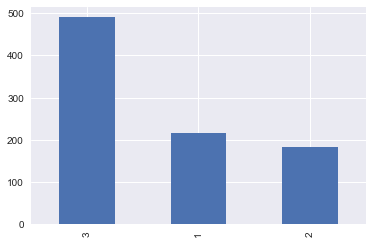

In [57]:
#乘客人数按照船舱等级分布情况
df.Pclass.value_counts().plot(kind ='bar')

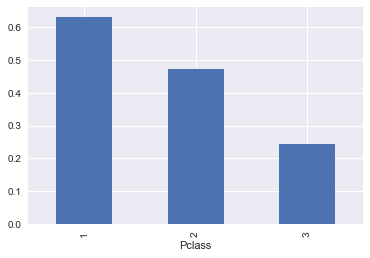

In [146]:
#不同船舱等级的生还率
(df.groupby('Pclass')['Survived'].sum()/df.groupby('Pclass')['Survived'].count()).plot(kind='bar')

In [ ]:
可见船上成员最多的是3等舱，在生还率方面而言，头等舱的生还率最高，而且船舱的等级越高的生还率越高

In [87]:
#老年人的生还率
titanic_old_df = df[df['Age']>=50]
old_survived_p = titanic_old_df['Survived'].sum()/titanic_old_df['Survived'].count()
#孩子的生还率
titanic_y_df = df[df['Age']<=15]
titanic_child_df = titanic_y_df[titanic_y_df['Age']>0]
child_survived_p =  titanic_child_df['Survived'].sum()/titanic_child_df['Survived'].count()
#成人的生还率
titanic_x_df = df[df['Age']>15]
titanic_adult_df = titanic_x_df[titanic_x_df['Age']<50]
adult_survived_p =  titanic_adult_df['Survived'].sum()/titanic_adult_df['Survived'].count()

print('Old:',old_survived_p)
print('Child:',child_survived_p)
print('Normal:',adult_survived_p)

Old: 0.358695652174
Child: 0.556603773585
Normal: 0.36075036075


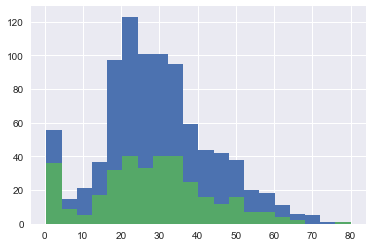

In [84]:

#乘客年龄分布直方图(蓝色)
df.loc[:,'Age'].hist(bins = 20)
#生还的乘客年龄分布直方图(绿色)
df.loc[df.Survived==1,'Age'].hist(bins = 20)


从处理后的数据和直方图可见，10岁以内孩子的生还率最高，老人生还率最低，可见"优先让孩子上救生船"也是真实的，而老人可能因为行动不便，在灾难来临时更容易遇难

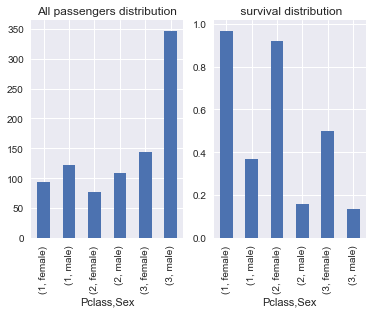

In [126]:
#查看不同船舱等级中乘客的性别分布

# df.Sex[df.Pclass == 1].plot(kind='bar')  
# df.Sex[df.Pclass == 2].plot(kind='bar')
# df.Sex[df.Pclass == 3].plot(kind='bar')
# plt.xlabel("Age")# plots an axis lable
# plt.ylabel("p") 
# plt.title("Diffient Pclass passengers' distribution by age")
# plt.legend(('Class 1', 'Class 2','Class 3'),loc='best') 
sex_pclass_survived = df.groupby(['Pclass','Sex']).sum()['Survived']
plt.subplot(121)
plt.title('All passengers distribution')
sex_pclass_all = df.groupby(['Pclass','Sex']).count()['Survived']
sex_pclass_all.plot(kind = 'bar')
plt.subplot(122)
plt.title(' survival distribution')
(sex_pclass_survived/sex_pclass_all).plot(kind = 'bar')


综合船舱等级和性别来看，首先再任何等级的船舱中女性存活率都比较高,高级舱的乘客存活率高于低级舱的乘客，其次头等舱的女性存活率最高，然后二级舱稍低一点，三级舱的女性存活率则低了很多，可能是因为三级舱人员太多导致逃生时更容易发生事故

**结论:乘客的生还率和乘客的性别，船舱等级以及乘客年龄都有着很大的关系**
- 船上的男性多于女性，三级舱中人数最多，且比例远高于其它两类舱
- 乘客的生还率和乘客所在的船舱等级直接相关，等级越高则生还率越高
- 一级舱中女性的生还率最高，二级舱女性生还率比一级舱略低，而三级舱的女性的生还率却比前两类船舱低了很多，可能是因为三级舱中人数太多，导致逃生时发生事故的可能提高
- 年龄对生还率也有一定影响，基本表现为，低年龄的生还率比较高(15岁以下),

**很大一部分原因应该就是成年人将救生船让给小孩和女性所以二者的生还率都比较高**